<a href="https://colab.research.google.com/github/amanchaumal/spam-detection-python-ml/blob/main/spamdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

try:
    df = pd.read_csv('/content/spam.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'spam.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


(5572, 5)


Data Shape: (5572, 5)

Data Types:
 v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

Missing Values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Target Variable Distribution:
 v1
ham     4825
spam     747
Name: count, dtype: int64


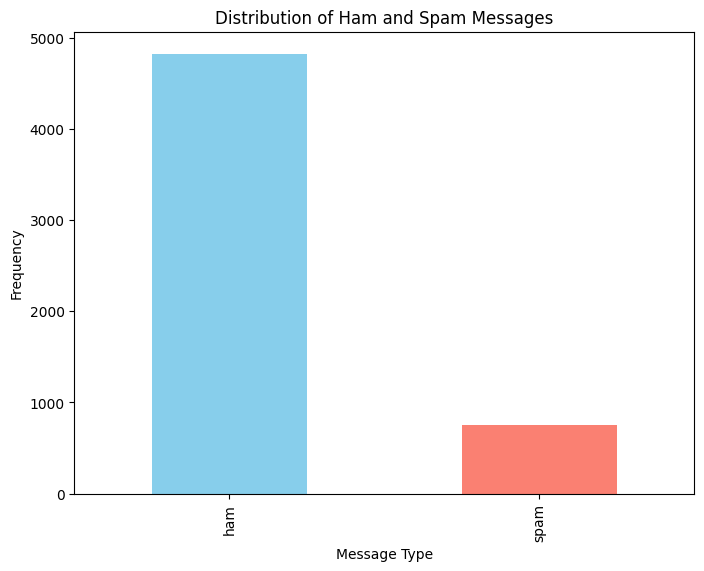


Average Message Length: 80.11880832735105
Max Message Length: 910

Number of messages with special characters: 5111

Number of messages with numbers: 1456


In [10]:
import matplotlib.pyplot as plt
# Examine Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Analyze Target Variable Distribution
target_counts = df['v1'].value_counts()
print("\nTarget Variable Distribution:\n", target_counts)

plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Message Type')
plt.ylabel('Frequency')
plt.show()


# Initial Feature Inspection (Text Data)
df['message_length'] = df['v2'].apply(len)
print("\nAverage Message Length:", df['message_length'].mean())
print("Max Message Length:", df['message_length'].max())

# Example of checking for special characters (you can expand this)
df['has_special_char'] = df['v2'].str.contains(r'[^\w\s]', regex=True)  # Check for non-alphanumeric characters
print("\nNumber of messages with special characters:", df['has_special_char'].sum())

# Example of checking for numbers (you can expand this)
df['has_number'] = df['v2'].str.contains(r'\d', regex=True)
print("\nNumber of messages with numbers:", df['has_number'].sum())

Percentage of Ham and Spam Messages:
 v1
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

Average Message Length by Class:
 v1
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

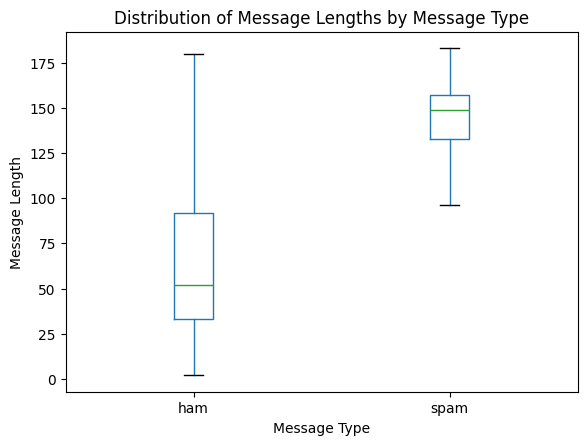


Percentage of Messages with Special Characters by Class:
 v1
ham     90.839378
spam    97.456493
Name: has_special_char, dtype: float64

Percentage of Messages with Numbers by Class:
 v1
ham     15.502591
spam    94.779116
Name: has_number, dtype: float64


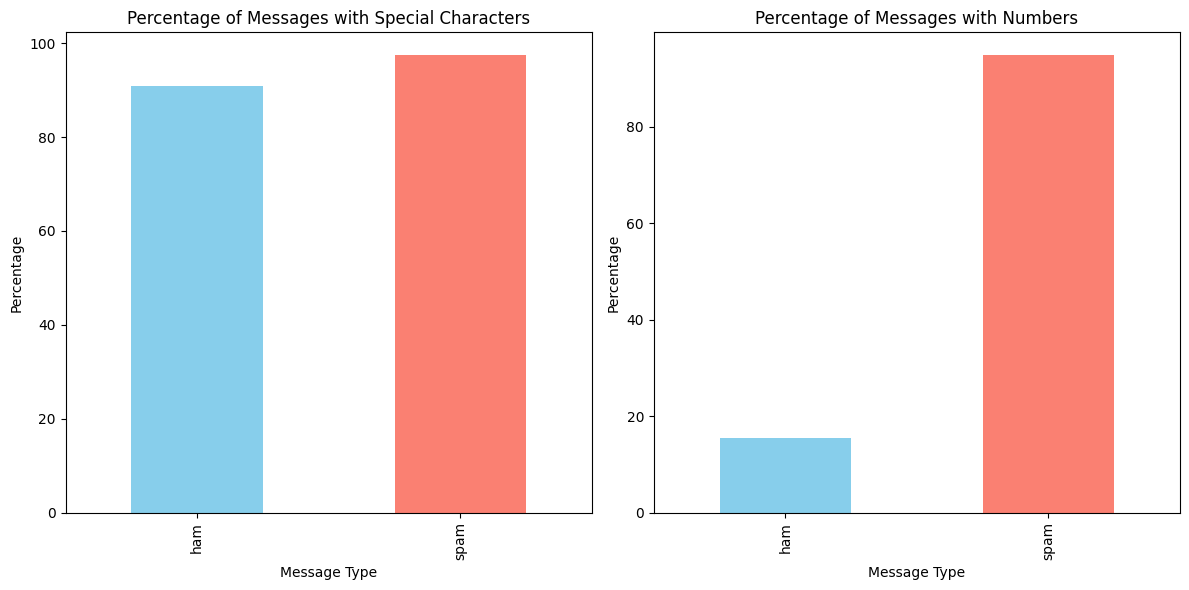

In [11]:
# Calculate the percentage of 'ham' and 'spam' messages
target_percentages = df['v1'].value_counts(normalize=True) * 100
print("Percentage of Ham and Spam Messages:\n", target_percentages)

# Calculate the average message length for 'ham' and 'spam' messages
average_message_length_by_class = df.groupby('v1')['message_length'].mean()
print("\nAverage Message Length by Class:\n", average_message_length_by_class)

# Visualize the distribution of message lengths for both classes using a box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='message_length', by='v1', grid=False, showfliers=False)
plt.title('Distribution of Message Lengths by Message Type')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Message Type')
plt.ylabel('Message Length')
plt.show()

# Calculate the percentage of 'ham' and 'spam' messages containing special characters
special_char_percentages = df.groupby('v1')['has_special_char'].mean() * 100
print("\nPercentage of Messages with Special Characters by Class:\n", special_char_percentages)

# Calculate the percentage of 'ham' and 'spam' messages containing numbers
number_percentages = df.groupby('v1')['has_number'].mean() * 100
print("\nPercentage of Messages with Numbers by Class:\n", number_percentages)

# Visualize the percentages of messages with special characters and numbers using grouped bar charts
plt.figure(figsize=(12, 6))

# Special Characters
plt.subplot(1, 2, 1)
special_char_percentages.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Messages with Special Characters')
plt.xlabel('Message Type')
plt.ylabel('Percentage')

# Numbers
plt.subplot(1, 2, 2)
number_percentages.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage of Messages with Numbers')
plt.xlabel('Message Type')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()

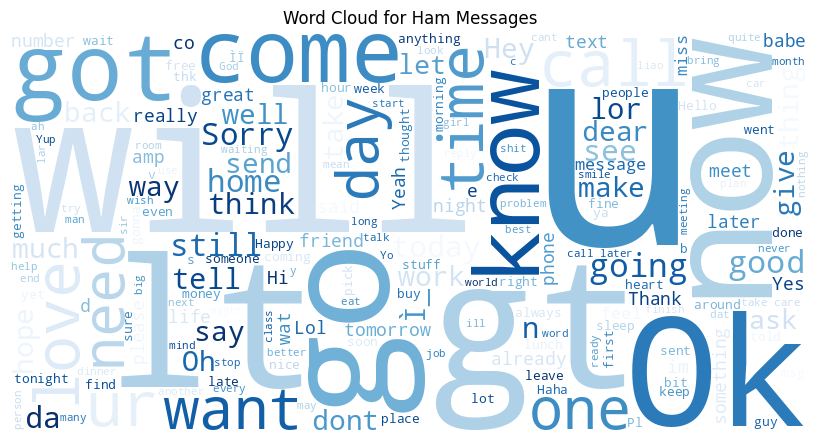

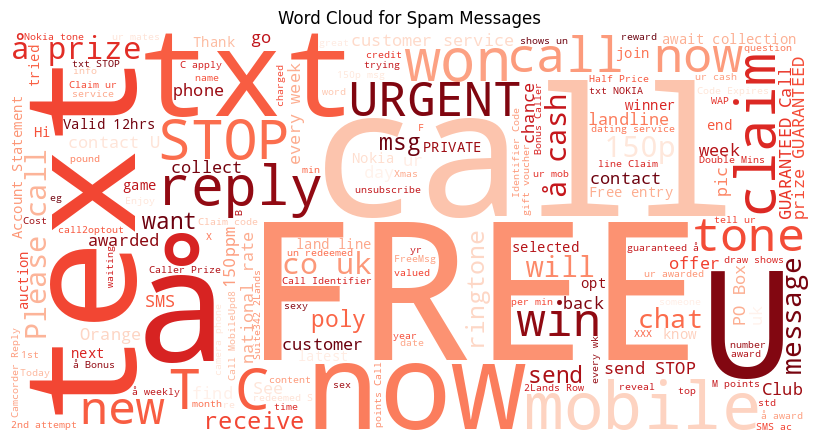

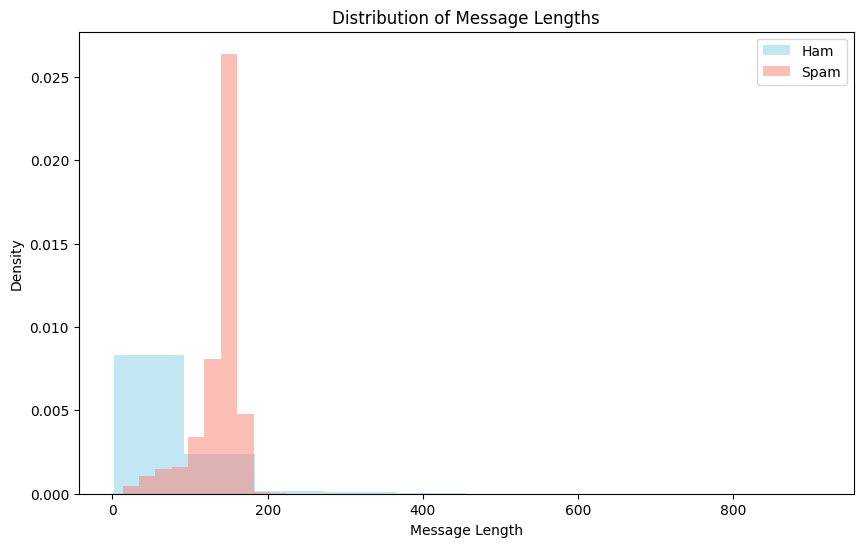

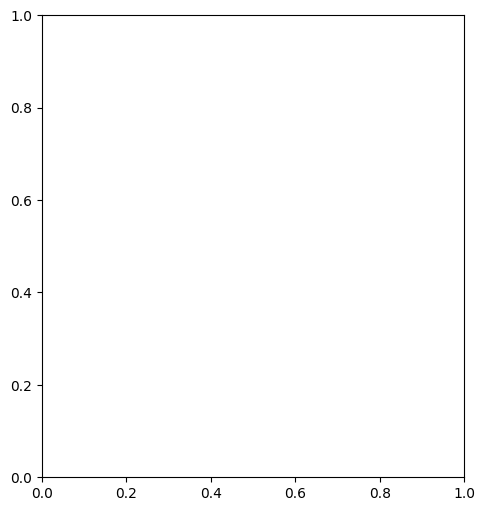

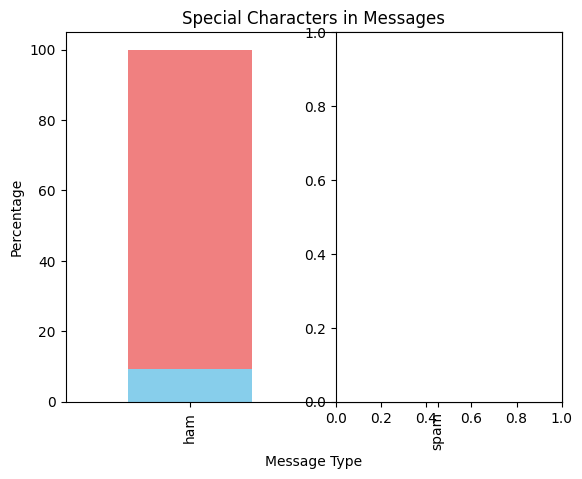

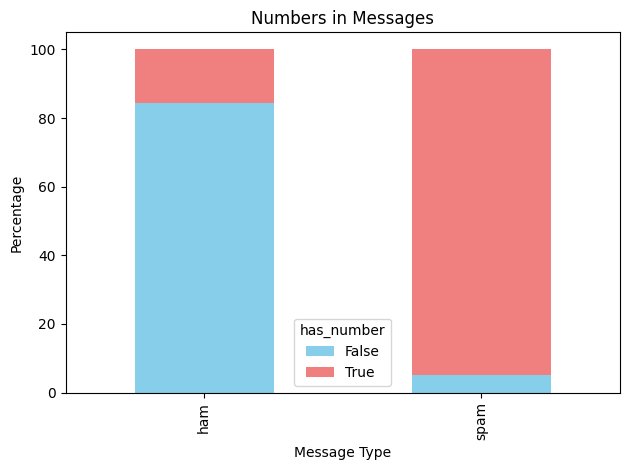

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

# 1. Word Clouds
def plot_wordcloud(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,
                          colormap=colormap,
                          min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.show()

ham_messages = ' '.join(df[df['v1'] == 'ham']['v2'].astype(str))
spam_messages = ' '.join(df[df['v1'] == 'spam']['v2'].astype(str))

plot_wordcloud(ham_messages, 'Word Cloud for Ham Messages', 'Blues')
plot_wordcloud(spam_messages, 'Word Cloud for Spam Messages', 'Reds')


# 2. Message Length Distributions
plt.figure(figsize=(10, 6))
df[df['v1'] == 'ham']['message_length'].plot(kind='hist', alpha=0.5, label='Ham', color='skyblue', density=True)
df[df['v1'] == 'spam']['message_length'].plot(kind='hist', alpha=0.5, label='Spam', color='salmon', density=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.legend()
plt.show()


# 3. Special Characters and Numbers
special_char_counts = df.groupby('v1')['has_special_char'].value_counts(normalize=True).unstack() * 100
number_counts = df.groupby('v1')['has_number'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
special_char_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Special Characters in Messages')
plt.xlabel('Message Type')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
number_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Numbers in Messages')
plt.xlabel('Message Type')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()